In [ ]:
# pip install autogluon

In [1]:
import pandas as pd
import numpy as np

In [2]:
#read firms
df_firms = pd.read_csv(r"C:\Users\hp\Downloads\synthetic_law_firm_level_pnc_auto_corrected.csv")

In [3]:
#reading litigation data
df_lit = pd.read_csv(r"C:\Users\hp\Downloads\lit_prop_2k_with_law_firm_assigned.csv")

In [4]:
df_firms.columns

Index(['Firm Name', 'Paid post appeal', 'Case closed count', 'Deduction fee',
       'Deduction expense', 'Billed units fee', 'Billed expense', 'Billed fee',
       'Paid fee', 'Paid expense', 'Cycle time', 'L100', 'L200', 'L300',
       'L400', 'L500', 'Win rate proxy', 'Cost per case', 'Fee per unit'],
      dtype='object')

#Log-Transform

In [5]:
log_transform_cols = ['Paid post appeal', 'Case closed count', 'Deduction fee',
       'Deduction expense', 'Billed units fee', 'Billed expense', 'Billed fee',
       'Paid fee', 'Paid expense', 'Cycle time',  'Cost per case']
for i in log_transform_cols:
    df_firms[i] = df_firms[i].apply(lambda x: np.log(x+1))

#Robust Scaler

In [6]:
from sklearn.preprocessing import RobustScaler

# Select only numeric columns for scaling
robust_scale_cols = ['Paid post appeal', 'Case closed count', 'Deduction fee',
       'Deduction expense', 'Billed units fee', 'Billed expense', 'Billed fee',
       'Paid fee', 'Paid expense', 'Cycle time', 'Win rate proxy', 'Cost per case', 'Fee per unit']

# robust_scale_cols = ['Paid post appeal', 'Case closed count', 'Deduction fee',
#        'Deduction expense', 'Billed units fee', 'Cycle time', 'Win rate proxy', 'Cost per case', 'Fee per unit']

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_firms[robust_scale_cols])

display(X_scaled)

array([[-0.38439866,  0.53520105, -0.89672085, ..., -0.16479401,
        -1.23253331,  1.13455328],
       [ 0.76584287, -0.31014566,  0.51491403, ..., -0.47191011,
         0.93345073,  0.52314316],
       [ 0.52888979,  0.6464424 ,  0.62582671, ..., -0.26966292,
         0.04438989,  0.03659849],
       ...,
       [ 0.26439878, -1.13731176, -0.23991704, ..., -0.53932584,
         0.62480169, -0.55758881],
       [ 0.09813058,  0.2931676 , -0.35048016, ...,  0.3670412 ,
        -0.53886416,  1.10871905],
       [-0.19399682,  0.7030613 ,  0.29833494, ...,  0.59925094,
        -0.41329647, -0.69537137]])

In [7]:
binary_cols = ['L100', 'L200', 'L300', 'L400', 'L500',]
X_binary = df_firms[binary_cols].values
X_final = np.hstack((X_scaled, X_binary))

#PCA

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_final)
print(X_pca)

[[-1.50182740e+00 -3.40938012e+00 -1.89534849e-01  9.78849857e-01
   1.23530254e-01  2.10883261e-01 -6.99112416e-01]
 [ 2.08315693e+00  1.13230513e+00  3.54917502e-01  6.22478387e-01
   2.44537693e-01 -8.96711124e-01  1.86528058e-02]
 [ 1.82313102e+00 -2.42213278e-01  1.17600023e+00  9.70751466e-01
  -4.47568217e-01 -6.20110030e-02  2.28326906e-01]
 [-5.16847821e-01 -1.10329838e+00  2.45668487e-02  1.03656647e+00
  -1.39487035e+00  9.83635252e-01  3.51531070e-01]
 [ 7.88250922e-01  5.72061025e-01  7.94665191e-01 -7.67347437e-01
  -1.71732774e+00  1.13393046e+00 -9.11838203e-02]
 [ 3.73607828e-02 -4.01271882e-01 -3.70456216e-01  8.75238903e-01
  -7.23058252e-01 -7.72882109e-01  1.70352525e-01]
 [ 5.96968304e-01 -2.49044217e+00 -2.04608228e+00 -4.42092003e-01
   1.71209799e+00 -2.76227354e-01  8.22460662e-01]
 [ 1.11295829e+00 -6.52616546e-01  9.87467582e-01 -4.98385377e-01
   1.54398194e-01 -1.62344311e-01  5.44174621e-01]
 [-1.44519433e+00  8.44815373e-01  1.44074842e-01  1.00382284e+0

In [9]:
pca.explained_variance_ratio_

array([0.28465287, 0.19797377, 0.13737924, 0.06228288, 0.05730402,
       0.04455236, 0.03963376])

#PCA

In [10]:
# import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = {}
K = range(2, 9)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    silhouette_scores[k] = silhouette_score(X_pca, labels)
    print(f"Silhouette Score for k={k}: {silhouette_scores[k]}")
 

Silhouette Score for k=2: 0.19031683068148678
Silhouette Score for k=3: 0.16717549487559755
Silhouette Score for k=4: 0.18524933938757981
Silhouette Score for k=5: 0.15262127178420765
Silhouette Score for k=6: 0.1666622841379934
Silhouette Score for k=7: 0.15237902599138095
Silhouette Score for k=8: 0.13930941542496136


In [11]:
#Choosing k=4 due to spike in silhouette score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,n_init=50, random_state=42)
labels_km = kmeans.fit_predict(X_pca)

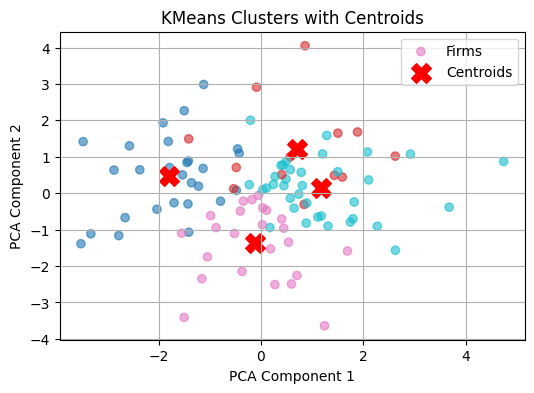

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the KMeans clusters and centroids
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km, cmap='tab10', alpha=0.6, label='Firms')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters with Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
#pca with silhouette 
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_pca, labels_km)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.18524933938757981


In [14]:
df_firms['cluster_kmeans'] = labels_km
cluster_profiles = df_firms.groupby('cluster_kmeans').agg(['count',list]).reset_index()
display(cluster_profiles)
firms_to_clusters = df_firms.groupby('Firm Name')['cluster_kmeans'].nunique()
overlapping_firms = firms_to_clusters[firms_to_clusters > 1].index.tolist()
# print(overlapping_firms)

cluster_kmeans Firm Name                                                     \
                     count                                               list   
0              0        27  [Edwards & Parker, LLP, Jackson, Scott & Partn...   
1              1        13  [Turner, Phillips & Partners, Scott, Phillips ...   
2              2        24  [Phillips & Garcia, LLP, Turner, Thompson & Ca...   
3              3        36  [Carter, Davis & Partners, Campbell & Kennedy,...   

  Paid post appeal                                                     \
             count                                               list   
0               27  [12.843069650865578, 13.637702866335324, 12.06...   
1               13  [14.045121423047997, 13.490267363009847, 13.37...   
2               24  [12.551873555883693, 11.342038562618507, 14.30...   
3               36  [14.268370260061257, 13.914766977475871, 10.91...   

  Case closed count                                                     \
              count                                               list   
0                27  [4.442651256490317, 5.017279836814924, 4.89034...   
1                13  [2.772588722239781, 2.3978952727983707, 2.3978...   
2                24  [5.214935757608986, 4.6913478822291435, 4.1431...   
3                36  [4.430816798843313, 5.318119993844216, 4.85203...   

  Deduction fee                                                     \
          count                                               list   
0            27  [7.403140307940165, 8.417425893401559, 6.43787...   
1            13  [8.361656885385562, 7.50436402574255, 9.070329...   
2            24  [7.187180860224074, 8.177296698716322, 8.41280...   
3            36  [8.903826081229067, 9.038703529774981, 8.68161...   

  Deduction expense  ...  L400  \
              count  ... count   
0                27  ...    27   
1                13  ...    13   
2                24  ...    24   
3                36  ...    36   

                                                      L500  \
                                                list count   
0  [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...    27   
1            [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1]    13   
2  [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...    24   
3  [1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...    36   

                                                     Win rate proxy  \
                                                list          count   
0  [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, ...             27   
1            [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]             13   
2  [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ...             24   
3  [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...             36   

                                                     Cost per case  \
                                                list         count   
0  [0.696, 0.719, 0.719, 0.841, 0.677, 0.876, 0.8...            27   
1  [0.792, 0.702, 0.697, 0.718, 0.898, 0.814, 0.6...            13   
2  [0.755, 0.877, 0.684, 0.819, 0.738, 0.701, 0.6...            24   
3  [0.714, 0.741, 0.889, 0.757, 0.691, 0.7, 0.687...            36   

                                                     Fee per unit  \
                                                list        count   
0  [5.939039033054211, 5.374027625782512, 4.86290...           27   
1  [8.240575020986183, 7.846676009916266, 8.42013...           13   
2  [4.628691381029437, 5.6049929154923515, 6.1946...           24   
3  [7.12311662735429, 6.099242139281413, 6.231583...           36   

                                                      
                                                list  
0  [13.7, 13.28, 10.03, 9.26, 11.85, 11.29, 11.44...  
1  [12.18, 10.12, 10.33, 10.27, 9.63, 9.86, 11.43...  
2  [13.89, 12.29, 9.66, 12.98, 9.36, 9.46, 10.49,...  
3  [12.47, 11.34, 9.01, 9.74, 13.23, 10.62, 10.21...  

[4 rows x 39 columns]

In [15]:
df_firms.rename(columns={'cluster_kmeans':'Cluster'}, inplace=True)

In [16]:
#Check for good segmentation/ directional separation
profile = df_firms.groupby('Cluster').agg({'Paid post appeal': 'median', 'Case closed count': 'median', 'Cycle time': 'median', 'Win rate proxy': 'median', 'Cost per case': 'median', 'Fee per unit': 'median'})
profile

,Paid post appeal,Case closed count,Cycle time,Win rate proxy,Cost per case,Fee per unit
Cluster,,,,,,
0,12.963908,4.744932,7.680730,0.7880,5.540400,11.440
1,13.490267,2.890372,7.412812,0.7260,7.846676,10.330
2,12.897522,4.465842,7.294047,0.7900,5.939971,11.715
3,13.548036,5.075154,7.453824,0.7575,6.083591,11.025


In [17]:
cluster_name_map = {0: 'High-Value Core Firms', #high fees, good win rate, balanced cost
                    1: 'High-Cost/ Underperformers', #gigh cost per case, weaker outcomes
                    2: 'Outcome Specialists', #strong win rate, moderate volumne
                    3: 'Efficient Volume Handlers' #high win rate, low cost, fast cycle
} 
df_firms['Cluster_name'] = df_firms['Cluster'].map(cluster_name_map)

#Create Radar charts

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# profile_scaled = scaler.fit_transform(profile)
# profile_scaled = pd.DataFrame(profile_scaled, index=profile.index, columns=profile.columns)

# #Invert Cost per case and Cycle time
# profile_scaled['Cost per case'] = 1 - profile_scaled['Cost per case']
# profile_scaled['Cycle time'] = 1 - profile_scaled['Cycle time']

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# def radar_chart(row, title):
#     labels = row.index.tolist()
#     values = row.values.tolist()
#     values+=values[:1]
#     angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
#     angles+=angles[:1]
#     fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
#     ax.plot(angles, values, linewidth=2, linestyle='solid')
#     ax.fill(angles, values, alpha=0.25)
#     ax.set_thetagrids(np.degrees(angles[:-1]), labels)
#     ax.set_title(title)
#     ax.set_rlabel_position(0)
#     ax.set_ylim(0, 1)
#     plt.show()
# for cluster_id in profile_scaled.index:
#     radar_chart(profile_scaled.loc[cluster_id], f'Cluster {cluster_id}')

In [ ]:
#Clustering map

In [18]:
# Final firm-level table
firm_cluster_df = pd.DataFrame({
    "firm_name": df_firms['Firm Name'],
    "cluster_id": df_firms['Cluster_name'],
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1]
})

# Optional: keep all PCs for debugging / centroid calcs
for i in range(X_pca.shape[1]):
    firm_cluster_df[f"PC{i+1}"] = X_pca[:, i]

In [19]:
pc_cols = [f"PC{i}" for i in range(1, 8)]

centroid_df = (
    firm_cluster_df
    .groupby("cluster_id")[pc_cols]
    .mean()
    .reset_index()
)

centroid_df["firm_name"] = centroid_df["cluster_id"].apply(
    lambda x: f"Cluster {x} Centroid"
)
centroid_df["entity_type"] = "centroid"
firm_cluster_df["entity_type"] = "firm"

common_cols = ["firm_name", "cluster_id", "entity_type"] + pc_cols

firm_cluster_augmented_df = pd.concat(
    [
        firm_cluster_df[common_cols],
        centroid_df[common_cols]
    ],
    ignore_index=True
)


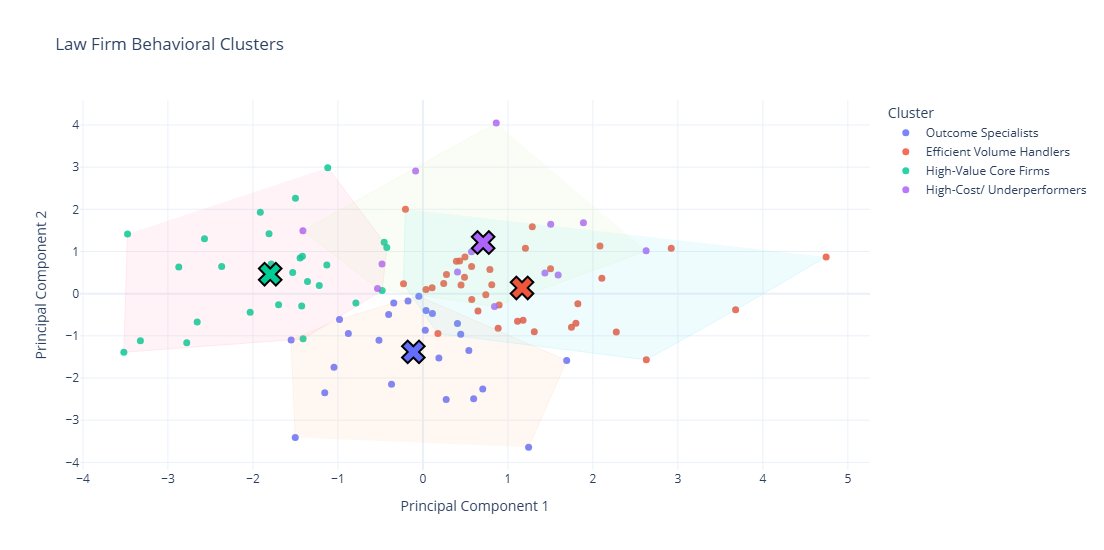

In [20]:
import plotly.express as px
from scipy.spatial import ConvexHull

# -------------------------------
# 1. Base scatter: firm points
# -------------------------------
fig = px.scatter(
    firm_cluster_augmented_df.query("entity_type == 'firm'"),
    x="PC1",
    y="PC2",
    color="cluster_id",
    hover_name="firm_name",
    title="Law Firm Behavioral Clusters",
    opacity=0.85
)

fig.update_traces(marker=dict(size=7))

# -------------------------------
# 2. Convex hull per cluster
# -------------------------------
for cluster_id in firm_cluster_augmented_df["cluster_id"].unique():
    cluster_points = firm_cluster_augmented_df.query(
        "cluster_id == @cluster_id and entity_type == 'firm'"
    )[["PC1", "PC2"]].values

    if cluster_points.shape[0] < 3:
        continue

    hull = ConvexHull(cluster_points)
    hull_points = cluster_points[hull.vertices]

    fig.add_scatter(
        x=hull_points[:, 0],
        y=hull_points[:, 1],
        fill="toself",
        mode="lines",
        line=dict(width=1),
        opacity=0.15,
        showlegend=False
    )

# -------------------------------
# 3. Overlay centroids
# -------------------------------
centroids_df = firm_cluster_augmented_df.query("entity_type == 'centroid'")

# Get color mapping from the base figure
cluster_color_map = {
    trace.name: trace.marker.color
    for trace in fig.data
    if trace.name is not None
}

# Add centroids per cluster using same color
for _, row in centroids_df.iterrows():
    fig.add_scatter(
        x=[row["PC1"]],
        y=[row["PC2"]],
        mode="markers",
        marker=dict(
            size=20,
            symbol="x",
            color=cluster_color_map.get(str(row["cluster_id"]), "black"),
            line=dict(width=2, color="black")
        ),
        showlegend=False
    )


# -------------------------------
# 4. Layout polish
# -------------------------------
fig.update_layout(
    template="plotly_white",
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis_title="Principal Component 1",
    yaxis_title="Principal Component 2",
    legend_title_text="Cluster",
    height=550
)


# -------------------------------
# 5. Render (IMPORTANT)
# -------------------------------
fig.show()


In [ ]:
#Saving clustering map output

In [21]:
firm_cluster_augmented_df.to_csv(r"C:\Users\hp\Downloads\firm_level_cluster_map_output.csv",index=False)

#Saving clustering output

In [22]:
df_firms.to_csv(r"C:\Users\hp\Downloads\synthetic_litigation_dataset_with_firms_and_cluster.csv", index=False)

#Multi-class ML model

#Reading clustering output

In [23]:
df_firms = pd.read_csv(r"C:\Users\hp\Downloads\synthetic_litigation_dataset_with_firms_and_cluster.csv")

#Reading litigation v2 dataset

In [ ]:
# #reading litigation data
# df_lit = pd.read_csv("/dbfs/FileStore/IP_development/Litigation_Propensity/synthetic_litigation_dataset_with_claims_andFirms.csv")

In [24]:
df_lit.columns

Index(['SUB_DTL_DESC', 'DEMAND', 'OFFER', 'COUNTER', 'MAJ_PERL_CD',
       'FTR_JRSDTN_ST_ABBR', 'VEH_REGISTERED_STATE', 'ACDNT_CITY',
       'POLICE_RPT_FILE_IND', 'BODY_PART_INJD_DESC', 'INSRD_FAULT_PCTG',
       'ATTY_REPRSNT_IND', 'ATTY_REPRSNT_IND_CLMNT', 'DRV_ATT_REP_IND',
       'HOSPTL_TRTMT_RECV_IND', 'DRVR_MEDCLLY_IMPAIRED_IND', 'COL_CD',
       'FTR_SIU_STATUS_DESC', 'CLMNT_GENDR_TYPE_CD', 'LOSS_PARTY',
       'AIA_POSTNS_5_AND_6_CD', 'AIA_POSTNS_3_AND_4_CD',
       'AIA_POSTNS_1_AND_2_CD', 'TOTAL_LOSS_IND', 'VEH_USAGE_CODE',
       'LOSS_DESC', 'INSRD_CONSENT_TO_SETL_IND', 'WEATHER_CONDTNS_CD',
       'ALL_VEH_DRVBL_IND', 'DOCTOR_TRTMT_RECV_IND', 'CLMNT_LOST_WAGES_IND',
       'CAUSE_OF_LOSS', 'EMPLYMT_STATUS_CD', 'ACDNT_WITNS_IND',
       'NBR_OF_VEHS_INVLD_IN_ACDNT', 'Claim_Notes', 'Law Firm Name'],
      dtype='object')

In [26]:
merged_df = df_lit.merge(df_firms[['Firm Name', 'Cluster']], right_on='Firm Name', left_on='Law Firm Name', how='left')
# display(merged_df)

In [27]:
merged_df['Cluster'].value_counts(normalize=True,dropna=False)

Cluster
3    0.505371
0    0.269054
2    0.196419
1    0.029156
Name: proportion, dtype: float64

In [28]:
#train test split
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

train_df, test_df = train_test_split(merged_df,test_size=0.2,stratify =merged_df['Cluster'],random_state=42)
print(train_df.shape,test_df.shape)

C:\Users\hp\.conda\envs\myenv_py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



(1564, 39) (391, 39)


In [29]:
print(train_df['Cluster'].value_counts(normalize=True,dropna=False),test_df['Cluster'].value_counts(normalize=True,dropna=False))

Cluster
3    0.505115
0    0.269182
2    0.196292
1    0.029412
Name: proportion, dtype: float64 Cluster
3    0.506394
0    0.268542
2    0.196931
1    0.028133
Name: proportion, dtype: float64


In [30]:
#features selection
from autogluon.tabular import TabularPredictor, FeatureMetadata
feature_metadata = FeatureMetadata.from_df(train_df)
print(feature_metadata)

('float', [])        :  4 | ['DEMAND', 'OFFER', 'COUNTER', 'INSRD_FAULT_PCTG']
('int', [])          :  3 | ['MAJ_PERL_CD', 'NBR_OF_VEHS_INVLD_IN_ACDNT', 'Cluster']
('object', [])       : 29 | ['SUB_DTL_DESC', 'FTR_JRSDTN_ST_ABBR', 'VEH_REGISTERED_STATE', 'ACDNT_CITY', 'POLICE_RPT_FILE_IND', ...]
('object', ['text']) :  3 | ['Claim_Notes', 'Law Firm Name', 'Firm Name']


In [53]:
#Iteration-1 (OG)
train_df = train_df.drop(columns=['VEH_REGISTERED_STATE','ACDNT_CITY','CAUSE_OF_LOSS','EMPLYMT_STATUS_CD','TOTAL_LOSS_IND','LOSS_DESC',
                                  'LOSS_PARTY','INSRD_CONSENT_TO_SETL_IND','ALL_VEH_DRVBL_IND','POLICE_RPT_FILE_IND','DRVR_MEDCLLY_IMPAIRED_IND',
                                  'FTR_SIU_STATUS_DESC','COL_CD','ACDNT_WITNS_IND'])
test_df = test_df.drop(columns=['VEH_REGISTERED_STATE','ACDNT_CITY','CAUSE_OF_LOSS','EMPLYMT_STATUS_CD','TOTAL_LOSS_IND','LOSS_DESC',
                                  'LOSS_PARTY','INSRD_CONSENT_TO_SETL_IND','ALL_VEH_DRVBL_IND','POLICE_RPT_FILE_IND','DRVR_MEDCLLY_IMPAIRED_IND',
                                  'FTR_SIU_STATUS_DESC','COL_CD','ACDNT_WITNS_IND'])

# #Iteration-2 and 3 (Drop features with importance <=0 and p_value >0.05)
# train_df = train_df.drop(columns=cols_to_drop)
# test_df = test_df.drop(columns=cols_to_drop)

In [32]:
from sklearn.metrics import f1_score
from autogluon.core.metrics import make_scorer
from sklearn.metrics._classification import f1_score
f1_scorer = make_scorer(name='f1',score_func=f1_score, optimum=1,greater_is_better=True, average='weighted',needs_proba=False, needs_threshold=False)

In [44]:
hyperparameters = {
    'GBM': [
        {},  # Standard LightGBM
        {
            'extra_trees': True,
            'ag_args': {'name_suffix': 'XT'}
        }
    ],
    'XGB': {}
}


In [54]:
predictor = TabularPredictor(label='Cluster',eval_metric=f1_scorer,problem_type='multiclass').fit(train_df.drop(columns=['Law Firm Name','Firm Name']),hyperparameters=hyperparameters,presets='medium_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20260128_171645"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.10.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          8
Memory Avail:       7.82 GB / 15.79 GB (49.5%)
Disk Space Avail:   56.46 GB / 237.20 GB (23.8%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "C:\Users\hp\Downloads\AutogluonModels\ag-20260128_171645"
Train Data Rows:    1564
Train Data Columns: 22
Label Column:       Cluster
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 4
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    8009.29 MB
	Train Data (Original)  Memory Usage: 2.06 MB (0.0% of available memory)
	Inferring data type of each feature based on 

In [58]:
models = predictor.model_names()
model_name=[]
recall=[]
precision=[]
f1=[]
accuracy=[]
for model in models:
    result = predictor.evaluate(test_df, model=model)
    model_name.append(model)
    #recall.append(result['recall'])
    #precision.append(result['precision'])
    f1.append(result['f1'])
    #accuracy.append(result['accuracy'])

result_dict = {'model_name':model_name,  'f1':f1}
df_result = pd.DataFrame(result_dict)
df_result

,model_name,f1
0,LightGBM,0.411323
1,LightGBMXT,0.417722
2,XGBoost,0.381404
3,WeightedEnsemble_L2,0.417722


In [59]:
test_data = test_df.copy()
test_data['predicted_cluster'] = predictor.predict(test_data.drop(columns=['Law Firm Name','Firm Name']), model='LightGBMXT')
test_data['proba'] = predictor.predict_proba(test_data, model='LightGBMXT').max(axis=1)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_true = test_df['Cluster']
y_pred = test_data['predicted_cluster']

print("Classification Report:")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("Accuracy:")
print(accuracy_score(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.29      0.33       105
           1       0.00      0.00      0.00        11
           2       0.15      0.04      0.06        77
           3       0.52      0.78      0.63       198

    accuracy                           0.48       391
   macro avg       0.27      0.28      0.25       391
weighted avg       0.40      0.48      0.42       391

Confusion Matrix:
[[ 30   0   4  71]
 [  0   0   1  10]
 [ 15   0   3  59]
 [ 32   0  12 154]]
Accuracy:
0.4782608695652174


C:\Users\hp\.conda\envs\myenv_py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\.conda\envs\myenv_py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\.conda\envs\myenv_py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [61]:
test_data['predicted_cluster'].value_counts(normalize=True)

predicted_cluster
3    0.751918
0    0.196931
2    0.051151
Name: proportion, dtype: float64

In [62]:
#Feature importance on Test data
fi = predictor.feature_importance(
    data=test_df,              
    num_shuffle_sets=10, model='LightGBMXT')
fi = pd.DataFrame(fi)
fi

These features in provided data are not utilized by the predictor and will be ignored: ['Law Firm Name', 'Firm Name']
Computing feature importance via permutation shuffling for 22 features using 391 rows with 10 shuffle sets...
	56.07s	= Expected runtime (5.61s per shuffle set)
	26.71s	= Actual runtime (Completed 10 of 10 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Claim_Notes,0.033219,0.020935,0.000361,10,0.054733,0.011704
WEATHER_CONDTNS_CD,0.011027,0.005508,0.000068,10,0.016687,0.005367
AIA_POSTNS_3_AND_4_CD,0.009144,0.006421,0.000741,10,0.015743,0.002545
FTR_JRSDTN_ST_ABBR,0.008564,0.010441,0.014519,10,0.019294,-0.002167
DEMAND,0.006953,0.004031,0.000201,10,0.011096,0.002811
SUB_DTL_DESC,0.006898,0.004620,0.000543,10,0.011645,0.002150
OFFER,0.006183,0.003145,0.000078,10,0.009414,0.002951
AIA_POSTNS_5_AND_6_CD,0.003594,0.003724,0.006872,10,0.007421,-0.000233
MAJ_PERL_CD,0.003020,0.004665,0.035477,10,0.007813,-0.001774
BODY_PART_INJD_DESC,0.002945,0.011090,0.211403,10,0.014342,-0.008452


In [63]:
fi_clean = fi.reset_index()
fi_clean = fi_clean.rename(columns={'index': 'Feature'})
fi_clean

,Feature,importance,stddev,p_value,n,p99_high,p99_low
0,Claim_Notes,0.033219,0.020935,0.000361,10,0.054733,0.011704
1,WEATHER_CONDTNS_CD,0.011027,0.005508,0.000068,10,0.016687,0.005367
2,AIA_POSTNS_3_AND_4_CD,0.009144,0.006421,0.000741,10,0.015743,0.002545
3,FTR_JRSDTN_ST_ABBR,0.008564,0.010441,0.014519,10,0.019294,-0.002167
4,DEMAND,0.006953,0.004031,0.000201,10,0.011096,0.002811
5,SUB_DTL_DESC,0.006898,0.004620,0.000543,10,0.011645,0.002150
6,OFFER,0.006183,0.003145,0.000078,10,0.009414,0.002951
7,AIA_POSTNS_5_AND_6_CD,0.003594,0.003724,0.006872,10,0.007421,-0.000233
8,MAJ_PERL_CD,0.003020,0.004665,0.035477,10,0.007813,-0.001774
9,BODY_PART_INJD_DESC,0.002945,0.011090,0.211403,10,0.014342,-0.008452


In [52]:
# cols_to_drop = fi_clean.loc[(fi_clean['importance']<=0) & (fi_clean['p_value'] > 0.05)]['Feature'].tolist()
# cols_to_drop

['CAUSE_OF_LOSS',
 'EMPLYMT_STATUS_CD',
 'TOTAL_LOSS_IND',
 'LOSS_DESC',
 'LOSS_PARTY',
 'INSRD_CONSENT_TO_SETL_IND',
 'ALL_VEH_DRVBL_IND',
 'POLICE_RPT_FILE_IND',
 'DRVR_MEDCLLY_IMPAIRED_IND',
 'FTR_SIU_STATUS_DESC',
 'COL_CD',
 'ACDNT_WITNS_IND']

In [ ]:
display(cluster_profiles)

In [ ]:
cluster_profiles = df_firms.groupby('Cluster').agg(['count',list]).reset_index()
display(cluster_profiles)

In [64]:

import pandas as pd
import ast
import html

# 0) Ensure Firm Name column is present from test_df
test_data['Firm Name'] = test_df['Firm Name']

# 1) Flatten/standardize cluster_profiles columns robustly
def flatten_columns(df):
    if isinstance(df.columns, pd.MultiIndex):
        # Join non-empty parts with '_' and strip trailing underscores
        new_cols = []
        for tpl in df.columns:
            parts = [str(p).strip() for p in tpl if str(p).strip() != ""]
            col = "_".join(parts) if parts else ""
            new_cols.append(col)
        df = df.copy()
        df.columns = new_cols
    else:
        # just ensure they're strings
        df = df.copy()
        df.columns = [str(c).strip() for c in df.columns]
    return df

cluster_profiles_flat = flatten_columns(cluster_profiles)

# 2) Identify the key columns dynamically
#    - Cluster column: name contains 'cluster' (case-insensitive)
#    - Firm list column: name contains both 'firm' and 'list' (case-insensitive)
def find_col(cols, must_contain):
    """Find first column whose lowercase name contains ALL required substrings."""
    lc = [c.lower() for c in cols]
    for i, c in enumerate(lc):
        if all(sub in c for sub in must_contain):
            return list(cols)[i]
    return None

cluster_col = find_col(cluster_profiles_flat.columns, ['cluster'])

# Prefer (firm & list); if not found, try just 'list'
firm_list_col = find_col(cluster_profiles_flat.columns, ['firm', 'list'])
if firm_list_col is None:
    firm_list_col = find_col(cluster_profiles_flat.columns, ['list'])

if cluster_col is None or firm_list_col is None:
    raise KeyError(
        f"Could not detect required columns. "
        f"Available columns: {list(cluster_profiles_flat.columns)} "
        f"(need something like 'Cluster' and 'Firm Name_list')."
    )

# 3) Parse list cells + unescape HTML + normalize spacing
def parse_list_cell(cell):
    """
    Convert a stringified list to a Python list; if it's already a list, return as-is.
    Unescape HTML entities and strip whitespace.
    """
    if isinstance(cell, list):
        out = cell
    elif isinstance(cell, str):
        # Heuristic: if it looks like a list literal, try literal_eval; otherwise, treat as single item
        s = cell.strip()
        if (s.startswith('[') and s.endswith(']')) or (s.startswith('(') and s.endswith(')')):
            try:
                out = ast.literal_eval(s)
            except Exception:
                out = [cell]
        else:
            out = [cell]
    else:
        out = []
    return [html.unescape(x).strip() for x in out if isinstance(x, str)]

cluster_profiles_flat = cluster_profiles_flat.copy()
cluster_profiles_flat[firm_list_col] = cluster_profiles_flat[firm_list_col].apply(parse_list_cell)

# 4) Build dict: cluster -> set of firm names (case-sensitive; change if needed)
cluster_firm_dict = {
    row[cluster_col]: set(row[firm_list_col])
    for _, row in cluster_profiles_flat.iterrows()
}

# 5) Normalize names in test_data for HTML entities/whitespace
def norm_name(x):
    return html.unescape(x).strip() if isinstance(x, str) else x

test_data['Firm Name'] = test_data['Firm Name'].apply(norm_name)

# (Optional) Align cluster types if needed (e.g., predicted_cluster is str while cluster is int)
# Uncomment if you see mismatches:
# test_data['predicted_cluster'] = pd.to_numeric(test_data['predicted_cluster'], errors='coerce')

# 6) Your checker (unchanged logic, using detected keys)
def check_firm_in_predicted_cluster(row):
    cluster = row['predicted_cluster']
    firm = row['Firm Name']
    if cluster in cluster_firm_dict and firm in cluster_firm_dict[cluster]:
        return 1, firm
    else:
        return 0, None

test_data[['is_firm_in_predicted_cluster','matched_firm']] = (
    test_data.apply(check_firm_in_predicted_cluster, axis=1, result_type='expand')
)

display(test_data[['Firm Name','predicted_cluster','is_firm_in_predicted_cluster','matched_firm']])


,Firm Name,predicted_cluster,is_firm_in_predicted_cluster,matched_firm
1069,"Walker, Taylor & Murphy, P.C.",3,1.0,"Walker, Taylor & Murphy, P.C."
460,"Carter & Associates, LLP",3,1.0,"Carter & Associates, LLP"
1915,"Williams, Davis & Campbell, P.C.",3,1.0,"Williams, Davis & Campbell, P.C."
212,Nelson Martin Law Group,3,0.0,NaN
254,"Thompson, Henderson & Roberts, P.C.",3,1.0,"Thompson, Henderson & Roberts, P.C."
...,...,...,...,...
781,"Roberts, Kennedy & Partners",0,0.0,NaN
1253,"White, Scott & Parker, P.C.",0,0.0,NaN
463,"Hughes & Turner, LLP",3,1.0,"Hughes & Turner, LLP"
1205,"Jackson & Associates, LLP",3,1.0,"Jackson & Associates, LLP"


In [65]:
#to validate firms
test_data['is_firm_in_predicted_cluster'].value_counts()

is_firm_in_predicted_cluster
0.0    204
1.0    187
Name: count, dtype: int64

In [66]:
test_df_out=pd.concat([test_df, test_data], axis=1)

In [67]:
test_df_out.head()

,SUB_DTL_DESC,DEMAND,OFFER,COUNTER,MAJ_PERL_CD,FTR_JRSDTN_ST_ABBR,BODY_PART_INJD_DESC,INSRD_FAULT_PCTG,ATTY_REPRSNT_IND,ATTY_REPRSNT_IND_CLMNT,...,CLMNT_LOST_WAGES_IND,NBR_OF_VEHS_INVLD_IN_ACDNT,Claim_Notes,Law Firm Name,Firm Name,Cluster,predicted_cluster,proba,is_firm_in_predicted_cluster,matched_firm
1069,Personal Auto BI,0.0,0.00,0.0,101,NaN,others,NaN,N,N,...,U,3,No indication of fraud found in preliminary ch...,"Walker, Taylor & Murphy, P.C.","Walker, Taylor & Murphy, P.C.",3,3,0.419405,1.0,"Walker, Taylor & Murphy, P.C."
460,Personal Auto BI,0.0,0.00,0.0,101,MI,Multiple body parts - applies when more than o...,0.0,Y,N,...,U,1,Policy coverage confirmation completed. Commun...,"Carter & Associates, LLP","Carter & Associates, LLP",3,3,0.838930,1.0,"Carter & Associates, LLP"
1915,Commercial Auto BI,0.0,0.00,0.0,101,IN,others,NaN,NaN,N,...,U,4,No indication of fraud found in preliminary ch...,"Williams, Davis & Campbell, P.C.","Williams, Davis & Campbell, P.C.",3,3,0.691190,1.0,"Williams, Davis & Campbell, P.C."
212,Personal Auto BI,0.0,37729.84,0.0,101,NaN,others,100.0,Y,N,...,NaN,1,Ongoing monitoring of medical treatment progre...,Nelson Martin Law Group,Nelson Martin Law Group,0,3,0.830354,0.0,NaN
254,Commercial Auto BI,0.0,0.00,0.0,101,OK,others,0.0,NaN,N,...,U,1,Correspondence sent to third-party administrat...,"Thompson, Henderson & Roberts, P.C.","Thompson, Henderson & Roberts, P.C.",3,3,0.776061,1.0,"Thompson, Henderson & Roberts, P.C."


In [68]:
test_df_out = test_df_out.loc[test_df_out['is_firm_in_predicted_cluster']==1]

In [69]:
test_df_out.to_csv(r"C:\Users\hp\Downloads\model_output_with_predicted_cluster.csv", index=False)